In [1]:
## https://elife-asu.github.io/PyInform/timeseries.html#module-pyinform.mutualinfo
# !pip install pyinform
# https://github.com/danielgreenfeld3/XIC/blob/master/hsic.py

In [2]:
# !pip3 install torch
# !pip3 install torchvision

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
def pairwise_distances(x):
    #x should be two dimensional
    instances_norm = np.sum(x**2,-1).reshape((-1,1))
    return -2*np.matmul(x,x.T) + instances_norm + instances_norm.T

def GaussianKernelMatrix(x, sigma=1):
    pairwise_distances_ = pairwise_distances(x)
    return np.exp(-pairwise_distances_ /sigma)

def HSIC(x, y, s_x=1, s_y=1):
    m,_ = x.shape #batch size
    K = GaussianKernelMatrix(x,s_x)
    L = GaussianKernelMatrix(y,s_y)
    H = np.eye(m) - 1.0/m * np.ones((m,m))
    HSIC = np.trace(np.matmul(L,np.matmul(H,np.matmul(K,H))))/((m-1)**2)
    return HSIC

In [5]:
data_file = 'Micro_wires_v36_Test_hsic.xlsx' #2,3 에는 mlp, 4,5에는 svr, 6,7에는 linear dataglove-predicted dataset가 들어있음
data_df = pd.read_excel(data_file, sheet_name='Data')
data_df

,Unnamed: 0,Electrode,Conventional,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,Finger,Thumb,NaN,NaN,NaN,Index,NaN,NaN,NaN,...,NaN,NaN,Ring,NaN,NaN,NaN,Little,NaN,NaN,NaN
1,NaN,Under,No strain,NaN,Strain,NaN,No strain,NaN,Strain,NaN,...,Strain,NaN,No strain,NaN,Strain,NaN,No strain,NaN,Strain,NaN
2,Time [ms],Signal source,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,...,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove,Electrode,Dataglove
3,0,0,-0.508113,-0.441485,-0.508113,0.276587,-0.508113,-0.172684,939.79818,930.81849,...,14,963,9,963,10,942,36,947,36,946
4,48,48,-0.508113,-0.441847,-0.508113,0.440929,-0.508113,-0.19834,942,934.86893,...,14,963,9,963,9.08035,941.29587,36,947,36,946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1428,1428,-0.508113,-0.442249,-0.508113,0.510763,-0.508113,1.462374,911.72745,912.13367,...,14,963,9.81202,964,9.10875,942,36,947,36,946
57,1472,1472,-0.508113,-0.44201,-0.508113,0.425558,-0.508113,1.829912,919.53452,912.21132,...,14,963,9.23165,964,9.97217,942,36,947,36,946
58,1476,1476,-0.508113,-0.439885,-0.508113,0.429321,-0.508113,2.713638,930.8197,917.67822,...,14,963,9,964,9.07091,942,36,947,36,946.34763
59,1524,1524,-0.508113,-0.439717,-0.508113,0.486375,-0.508113,1.586011,941.0435,923.68088,...,14,963.0733,9,964,9,942,36,947,35.16966,946.9267


In [6]:
columns = ['e_no_strain', 'd_no_strain', 'e_strain', 'd_strain']
fingers = ['thumb', 'index', 'middle', 'ring', 'little']

In [7]:
col_start = 2
conventional_emg_df = {}
for cf, f in enumerate(fingers):
  conventional_emg_df[f] = data_df.iloc[3:,col_start+len(columns)*cf:col_start+len(columns)*(cf+1)].astype('float')
  conventional_emg_df[f].columns = columns
display(conventional_emg_df['thumb'])

col_start = 22
cfee_emg_df = {}
for cf, f in enumerate(fingers):
  cfee_emg_df[f] = data_df.iloc[3:,col_start+len(columns)*cf:col_start+len(columns)*(cf+1)].astype('float')
  cfee_emg_df[f].columns = columns
display(cfee_emg_df['thumb'])

,e_no_strain,d_no_strain,e_strain,d_strain
3,-0.508113,-0.441485,-0.508113,0.276587
4,-0.508113,-0.441847,-0.508113,0.440929
5,-0.508113,-0.442002,-0.508113,0.546605
6,-0.508113,-0.442182,-0.508113,0.605990
7,-0.508113,-0.442219,-0.508113,0.543299
8,-0.508113,-0.442162,-0.508113,0.415917
9,-0.508113,-0.441314,-0.508113,0.356928
10,-0.508113,-0.440008,-0.508113,0.409179
11,-0.508113,-0.441417,-0.508113,0.494414
12,-0.508113,-0.442147,-0.508113,0.600647


,e_no_strain,d_no_strain,e_strain,d_strain
3,505.00000,931.00000,22.00000,1132.00000
4,322.10499,930.08262,21.08035,1132.00000
5,232.46838,929.16525,20.16070,1132.00000
6,500.92257,921.22802,20.00000,1132.00000
7,648.74496,911.74847,20.00000,1132.00000
8,648.17621,906.89076,20.00000,1132.00000
9,648.00000,905.05601,20.00000,1132.00000
10,648.00000,903.23362,20.00000,1132.00000
11,647.51954,901.42799,20.00000,1132.00000
12,646.96193,900.38373,20.00000,1132.00000


In [8]:
conventional_emg_results = {}
for f in fingers:
  time_series = conventional_emg_df[f].iloc[:,0:2].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_no_strain'
  conventional_emg_results[key] = hsic
  print(key, hsic)

  time_series = conventional_emg_df[f].iloc[:,2:4].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_strain'
  conventional_emg_results[key] = hsic
  print(key, hsic)

thumb_no_strain 0.03946595221570834
thumb_strain 0.03209993526115566
index_no_strain 0.002997344425153664
index_strain 0.06120046962445715
middle_no_strain 0.029781830699542353
middle_strain 0.029781832248791218
ring_no_strain 0.033937176124754165
ring_strain 0.0339371693492873
little_no_strain -1.424833200366792e-17
little_strain 7.682918885062562e-18


In [9]:
cfee_emg_results = {}
for f in fingers:
  time_series = cfee_emg_df[f].iloc[:,0:2].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_no_strain'
  cfee_emg_results[key] = hsic
  print(key, hsic)

  time_series = cfee_emg_df[f].iloc[:,2:4].dropna()
  t1 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,0]).T)
  t2 = StandardScaler().fit_transform(np.atleast_2d(time_series.iloc[:,1]).T)
  hsic = HSIC(t1,t2)
  key = f + '_strain'
  cfee_emg_results[key] = hsic
  print(key, hsic)

thumb_no_strain 0.029781830699542353
thumb_strain 0.011108250782378816
index_no_strain 0.005591575088785725
index_strain 0.004582138217024328
middle_no_strain 0.011126044703878924
middle_strain 0.016562396392320086
ring_no_strain 0.0063322912950738875
ring_strain 0.0008609273277454818
little_no_strain 1.5405882171694302e-17
little_strain 0.0012728278635076662


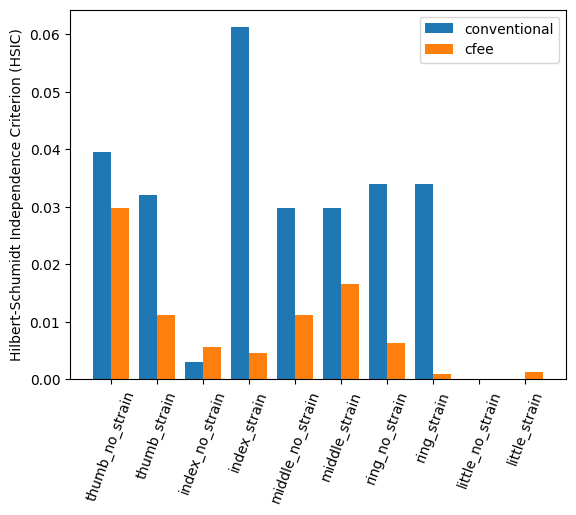

In [10]:
keys = conventional_emg_results.keys()
index = np.arange(len(keys))
bar_width = 0.4
fig, ax = plt.subplots()
conventional = ax.bar(index, [conventional_emg_results[k] for k in keys], bar_width, label='conventional')
cfee = ax.bar(index+bar_width, [cfee_emg_results[k] for k in keys], bar_width, label='cfee')


ax.set_ylabel('Hilbert-Schumidt Independence Criterion (HSIC)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(keys, rotation=70)
ax.legend()
plt.show()